### Given a dataset of user transactions *throughout a year*, *derive valuable insights*, *identify problems*, *state assumptions* and *steps to prove* the hypotheses.

In [174]:
import pandas as pd

In [205]:
#reading the csv data file from local storage. It is a dataframe now.
df = pd.read_csv('/content/data.csv')

In [176]:
df

,CREATED_DATE,CREATED_DATE minus Hour,USER_ID,TRANSACTION_ID,TYPE,CURRENCY,AMOUNT
0,2016-01-09 0:18:14,9/1/2016,45e3c222-38ac-4fdb-b092-ff1639e4438c,27d7fd11-d885-4d2c-9ed1-daa89b7bda1d,TOPUP,EUR,177.38
1,2016-01-09 2:28:34,9/1/2016,57c11728-b979-4856-bada-1d268726cfe9,2e1ee26c-0d24-4931-a7f9-0caa0d07eb2e,BANK_TRANSFER,EUR,310.27
2,2016-01-09 4:00:34,9/1/2016,1319cca9-02a7-4a15-8abb-48d4e08e5aa3,bfd20e6f-ddb3-4237-bcd2-f7f8d967e36e,CARD_PAYMENT,EUR,96.44
3,2016-01-09 10:26:27,9/1/2016,3f6bb28c-f945-4027-9178-747956c3ea58,85037186-039a-4ae5-9fea-e87f30822218,BANK_TRANSFER,EUR,288.51
4,2016-01-09 11:37:59,9/1/2016,f54baeeb-7282-4d23-9bb7-e8396ce1b159,8e1e938a-1916-4d5e-b261-82c61a6979d6,CARD_PAYMENT,GBP,88.45
...,...,...,...,...,...,...,...
9995,2017-01-08 22:07:16,8/1/2017,71aa9559-601d-43a8-bee0-352862ebb72a,aa4bc253-ee24-4095-8a21-8d7f493f54f0,BANK_TRANSFER,GBP,175.27
9996,2017-01-08 22:36:21,8/1/2017,9818f617-fb92-42f9-9862-e471ac890a17,9f96f6f2-9b23-4b86-965d-354cd1b42fc1,CARD_PAYMENT,GBP,108.71
9997,2017-01-08 22:54:55,8/1/2017,9818f617-fb92-42f9-9862-e471ac890a17,d2c618b2-1959-4fa5-bc7f-afe995461db8,TOPUP,GBP,285.68
9998,2017-01-08 23:25:27,8/1/2017,5c66f743-cba3-48aa-86a7-2562d051c277,56e241c8-024f-4233-ac70-a557946b6f1e,ATM,GBP,17.32


In [206]:
# Function to convert 'AMOUNT' value based on 'CURRENCY'
def convert_amount(row):
    if row['CURRENCY'] == 'GBP':
        return 1.17 * row['AMOUNT']
    else:
        return row['AMOUNT']

# Apply the conversion function to the 'AMOUNT' column
df['CONVERTED'] = df['AMOUNT']
df['CONVERTED'] = df.apply(convert_amount, axis=1)

In [207]:
df['CREATED_DATE'] = pd.to_datetime(df['CREATED_DATE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   CREATED_DATE             10000 non-null  datetime64[ns]
 1   CREATED_DATE minus Hour  10000 non-null  object        
 2   USER_ID                  10000 non-null  object        
 3   TRANSACTION_ID           10000 non-null  object        
 4   TYPE                     10000 non-null  object        
 5   CURRENCY                 10000 non-null  object        
 6   AMOUNT                   10000 non-null  float64       
 7   CONVERTED                10000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 625.1+ KB


Convert 'CREATED_DATE' to datetime format. Extract the time, year, month and hour from it. Modify inplace.

In [208]:
#Convert 'CREATED_DATE' to datetime format. Extract the time, year, month and hour from it. Modify inplace.
import calendar
df['CREATED_TIME'] = df['CREATED_DATE'].dt.time
df['CREATED_HOUR'] = df['CREATED_DATE'].dt.hour
df['CREATED_YEAR'] = df['CREATED_DATE'].dt.year
df['CREATED_MONTH'] = df['CREATED_DATE'].dt.month.map(lambda x: calendar.month_name[x])
df

,CREATED_DATE,CREATED_DATE minus Hour,USER_ID,TRANSACTION_ID,TYPE,CURRENCY,AMOUNT,CONVERTED,CREATED_TIME,CREATED_HOUR,CREATED_YEAR,CREATED_MONTH
0,2016-01-09 00:18:14,9/1/2016,45e3c222-38ac-4fdb-b092-ff1639e4438c,27d7fd11-d885-4d2c-9ed1-daa89b7bda1d,TOPUP,EUR,177.38,177.3800,00:18:14,0,2016,January
1,2016-01-09 02:28:34,9/1/2016,57c11728-b979-4856-bada-1d268726cfe9,2e1ee26c-0d24-4931-a7f9-0caa0d07eb2e,BANK_TRANSFER,EUR,310.27,310.2700,02:28:34,2,2016,January
2,2016-01-09 04:00:34,9/1/2016,1319cca9-02a7-4a15-8abb-48d4e08e5aa3,bfd20e6f-ddb3-4237-bcd2-f7f8d967e36e,CARD_PAYMENT,EUR,96.44,96.4400,04:00:34,4,2016,January
3,2016-01-09 10:26:27,9/1/2016,3f6bb28c-f945-4027-9178-747956c3ea58,85037186-039a-4ae5-9fea-e87f30822218,BANK_TRANSFER,EUR,288.51,288.5100,10:26:27,10,2016,January
4,2016-01-09 11:37:59,9/1/2016,f54baeeb-7282-4d23-9bb7-e8396ce1b159,8e1e938a-1916-4d5e-b261-82c61a6979d6,CARD_PAYMENT,GBP,88.45,103.4865,11:37:59,11,2016,January
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2017-01-08 22:07:16,8/1/2017,71aa9559-601d-43a8-bee0-352862ebb72a,aa4bc253-ee24-4095-8a21-8d7f493f54f0,BANK_TRANSFER,GBP,175.27,205.0659,22:07:16,22,2017,January
9996,2017-01-08 22:36:21,8/1/2017,9818f617-fb92-42f9-9862-e471ac890a17,9f96f6f2-9b23-4b86-965d-354cd1b42fc1,CARD_PAYMENT,GBP,108.71,127.1907,22:36:21,22,2017,January
9997,2017-01-08 22:54:55,8/1/2017,9818f617-fb92-42f9-9862-e471ac890a17,d2c618b2-1959-4fa5-bc7f-afe995461db8,TOPUP,GBP,285.68,334.2456,22:54:55,22,2017,January
9998,2017-01-08 23:25:27,8/1/2017,5c66f743-cba3-48aa-86a7-2562d051c277,56e241c8-024f-4233-ac70-a557946b6f1e,ATM,GBP,17.32,20.2644,23:25:27,23,2017,January


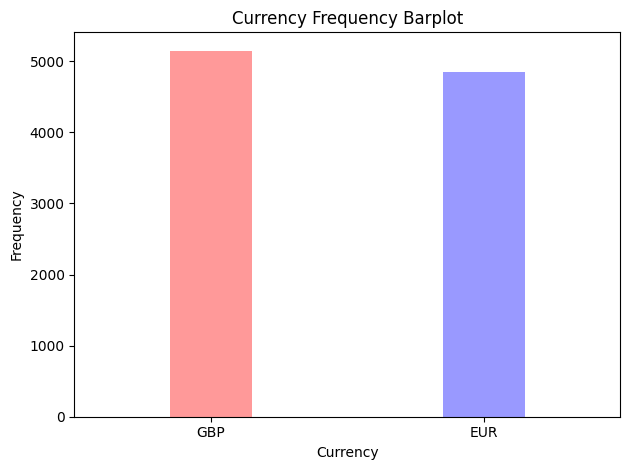

In [181]:
from matplotlib import pyplot as plt

# Count the frequencies of unique values in 'CURRENCY'
currency_counts = df['CURRENCY'].value_counts()

# Plotting
plt.bar(currency_counts.index, currency_counts.values, width = 0.3, color = ['red', 'blue'], alpha = 0.4)
plt.xlim(-0.5, len(currency_counts) - 0.5)
plt.xlabel('Currency')
plt.ylabel('Frequency')
plt.title('Currency Frequency Barplot')

plt.tight_layout()

plt.show()

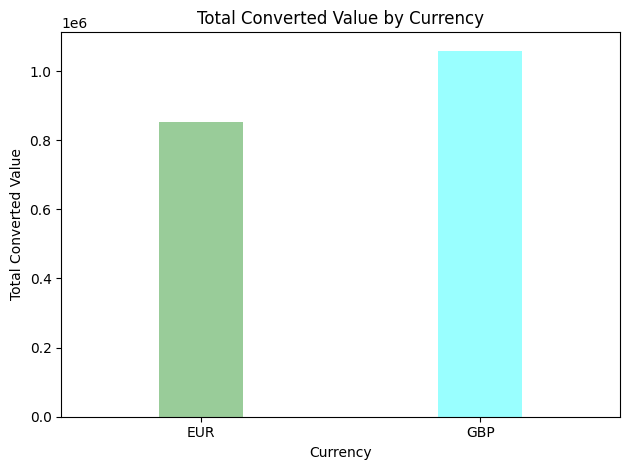

In [182]:
from matplotlib import pyplot as plt1

# Group by 'CURRENCY' and calculate the sum of 'CONVERTED' values
currency_grouped = df.groupby('CURRENCY')['CONVERTED'].sum()

plt1.bar(currency_grouped.index, currency_grouped.values, width=0.3, color=['green', 'aqua'], alpha = 0.4)

plt1.xlim(-0.5, len(currency_grouped) - 0.5)

plt1.xlabel('Currency')
plt1.ylabel('Total Converted Value')
plt1.title('Total Converted Value by Currency')

plt1.tight_layout()
plt1.show()

In [183]:
currency_grouped

CURRENCY
EUR    8.523633e+05
GBP    1.059223e+06
Name: CONVERTED, dtype: float64

1. The above 2 plots imply that more than `51%` of the transactions, in terms of both frequnecy and amount are done in 'GBP'.

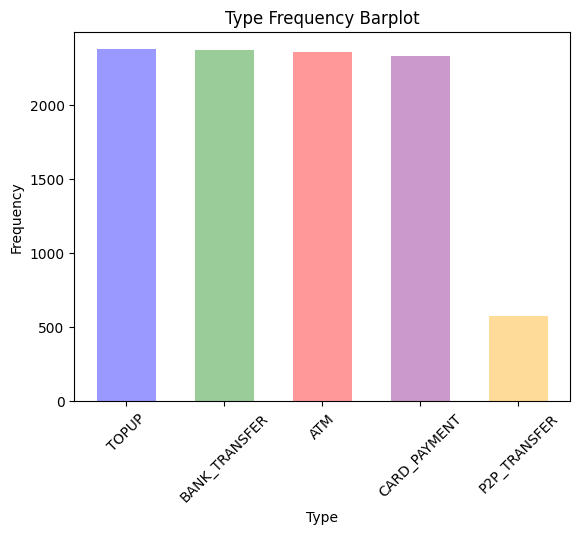

In [184]:
from matplotlib import pyplot as plt3

# Count the frequencies of unique values in 'CURRENCY'
type_counts = df['TYPE'].value_counts()

# Plotting
plt3.bar(type_counts.index, type_counts.values, width = 0.6, color = ['blue', 'green', 'red', 'purple', 'orange'], alpha = 0.4)
plt3.xlabel('Type')
plt3.ylabel('Frequency')
plt3.title('Type Frequency Barplot')
plt3.xticks(rotation=45)

plt3.show();

In [185]:
type_counts

TOPUP            2373
BANK_TRANSFER    2371
ATM              2357
CARD_PAYMENT     2325
P2P_TRANSFER      574
Name: TYPE, dtype: int64

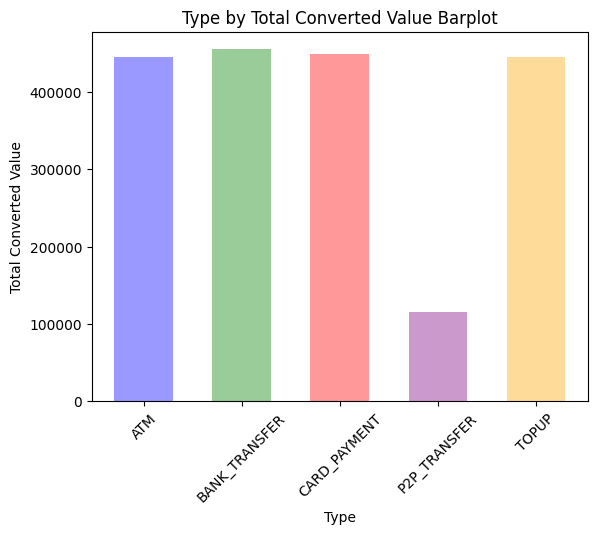

In [186]:
from matplotlib import pyplot as plt4

# Group by 'TYPE' and calculate the sum of 'CONVERTED' values
type_grouped = df.groupby('TYPE')['CONVERTED'].sum()

# Plotting
plt4.bar(type_grouped.index, type_grouped.values, width = 0.6, color = ['blue', 'green', 'red', 'purple', 'orange'], alpha = 0.4)
plt4.xlabel('Type')
plt4.ylabel('Total Converted Value')
plt4.title('Type by Total Converted Value Barplot')
plt4.xticks(rotation=45)

plt4.show();

In [187]:
type_grouped

TYPE
ATM              445453.6025
BANK_TRANSFER    455200.2424
CARD_PAYMENT     449657.5686
P2P_TRANSFER     115934.1784
TOPUP            445341.1987
Name: CONVERTED, dtype: float64

2. The above 2 results impliy that *P2P_TRANSFER* is *least preferred*.

In [188]:
time_grouped = df.groupby('CREATED_HOUR')['CONVERTED'].count()

# Find the time with the highest transaction count
most_common_time = time_grouped.idxmax()
most_common_time

12

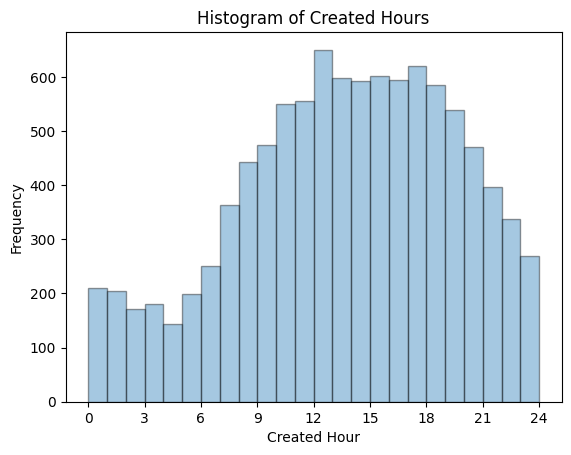

In [189]:
from matplotlib import pyplot as plt5

plt5.hist(df['CREATED_HOUR'], bins=24, range=(0, 24), edgecolor='black', alpha = 0.4)
plt5.xlabel('Created Hour')
plt5.ylabel('Frequency')
plt5.title('Histogram of Created Hours')
plt5.xticks(range(0, 25, 3))
plt5.show()

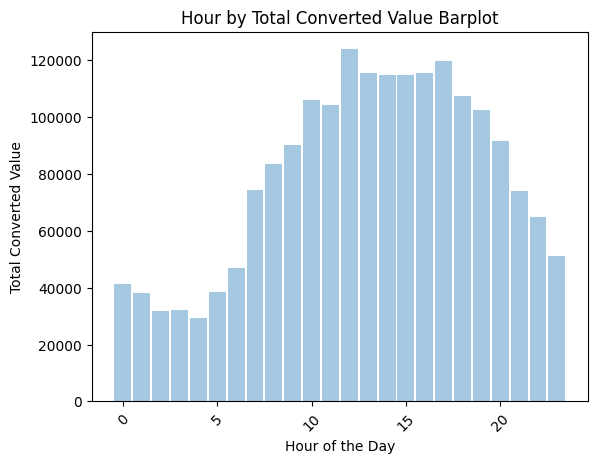

In [190]:
from matplotlib import pyplot as plt6

# Group by 'TYPE' and calculate the sum of 'CONVERTED' values
type_grouped = df.groupby('CREATED_HOUR')['CONVERTED'].sum()

# Plotting
plt6.bar(type_grouped.index, type_grouped.values, alpha = 0.4, width = 0.9)
plt6.xlabel('Hour of the Day')
plt6.ylabel('Total Converted Value')
plt6.title('Hour by Total Converted Value Barplot')
plt6.xticks(rotation=45)

plt6.show();

In [191]:
type_grouped

CREATED_HOUR
0      41153.3426
1      38142.8330
2      31939.5926
3      32134.4752
4      29172.6556
5      38325.6954
6      46908.0640
7      74322.8267
8      83507.1953
9      90336.2847
10    105913.0614
11    104306.8746
12    123813.6075
13    115541.3237
14    114892.9766
15    114667.5528
16    115483.1383
17    119800.7688
18    107515.3267
19    102548.3256
20     91459.9673
21     73953.2490
22     64777.0308
23     50970.6224
Name: CONVERTED, dtype: float64

3. The above 2 plots imply that during `12-1pm` and `4-5am` the most and least transactions (both in terms of *number* and *total amount*) take place respectively.

In [209]:
#making ascendingly and descendingly sorted copies of the dataframe
sorted_df_asc = df.sort_values(by='CONVERTED', ascending=True)
sorted_df_desc = df.sort_values(by='CONVERTED', ascending=False)

In [193]:
sorted_df_desc['CONVERTED'].head(3000).sum()/sorted_df_desc['CONVERTED'].sum()

0.5124734169106263

In [194]:
sorted_df_asc['CONVERTED'].head(7000).sum()/sorted_df_asc['CONVERTED'].sum()

0.48752658308937363

4. More than `51%` of amount transacted is contributed by 30% of the data.

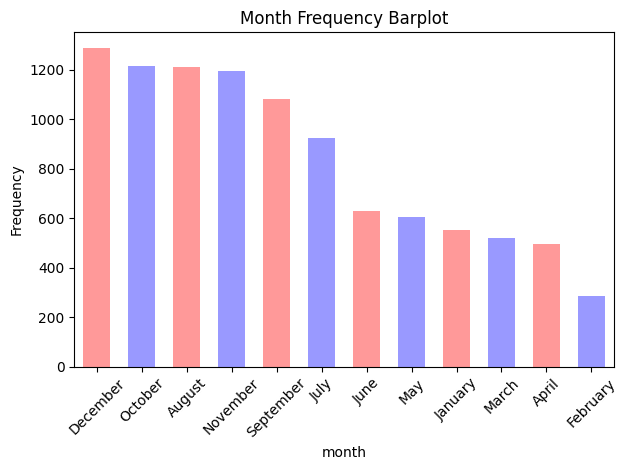

In [210]:
from matplotlib import pyplot as plt7

# Count the frequencies of unique values in 'month'
month_counts = df['CREATED_MONTH'].value_counts()

# Plotting
plt7.bar(month_counts.index, month_counts.values, width = 0.6, color = ['red', 'blue'], alpha = 0.4)
plt7.xlim(-0.5, len(month_counts) - 0.5)
plt7.xlabel('month')
plt7.ylabel('Frequency')
plt7.title('Month Frequency Barplot')
plt7.xticks(rotation=45)

plt7.tight_layout()

plt7.show()

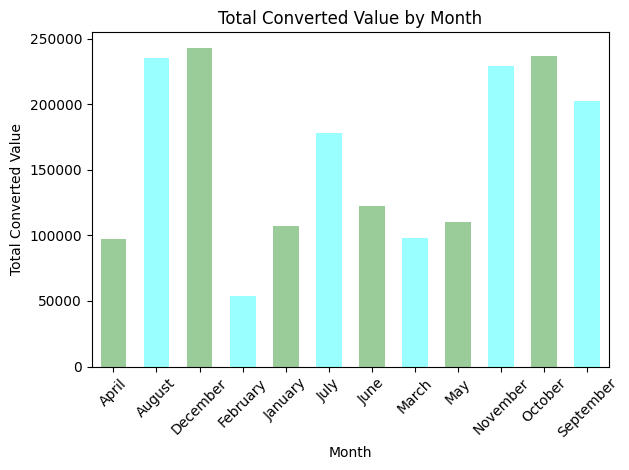

In [211]:
from matplotlib import pyplot as plt8

# Group by 'CURRENCY' and calculate the sum of 'CONVERTED' values
month_grouped = df.groupby('CREATED_MONTH')['CONVERTED'].sum()

plt8.bar(month_grouped.index, month_grouped.values, width=0.6, color=['green', 'aqua'], alpha = 0.4)

plt8.xlim(-0.5, len(month_grouped) - 0.5)

plt8.xlabel('Month')
plt8.ylabel('Total Converted Value')
plt8.title('Total Converted Value by Month')
plt8.xticks(rotation=45)

plt8.tight_layout()
plt8.show()

5. From the above 2 plots, it is seen that the most and least transactions, in terms of both frequency and amount take place in *December* and *February*, respectively.